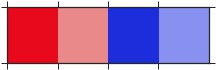

In [2]:
from __future__ import division
from scipy import stats
from scipy.stats.stats import pearsonr, spearmanr
import scikits.bootstrap as boot
from scipy.stats import ttest_rel
import itertools
import myhddm

os.chdir('/Users/kyle/Dropbox/PFH/iPFH/')
colors=["#0000B8",'#005CE6',"#89a0ff","#990000" ,'#FF1919', "#ea8989"]
#clist=[blues[-4], blues[-3], reds[-4], reds[-2]]

blues=['#1c2ddc', '#8891f0']
reds=['#e9091c', '#ea8989']
hs([blues, reds]).tolist()
clist = hs([blues[::-1], reds[::-1]]).tolist()[::-1]
sns.palplot(clist)

In [22]:
h = np.array([msm.vHH.values, msm.vFH.values, msm.vNH.values]).mean(axis=0)
f = np.array([msm.vHF.values, msm.vFF.values, msm.vNF.values]).mean(axis=0)

In [15]:
h = np.array([msm.vHH.values, msm.vFH.values, msm.vNH.values]).mean(axis=0)
f = np.array([msm.vHF.values, msm.vFF.values, msm.vNF.values]).mean(axis=0)

In [160]:
c = np.array([msm.zH2a.values, msm.zF2a.values]).mean(axis=0)
cbold = np.array([wpk_ffa.fcF, wpk_ffa.hcF, wpk_ffa.ncF]).mean(axis=0)

In [161]:
pearsonr(h, f)
pearsonr(msm.zF, msm.zH)

(0.76339295422054243, 0.00014309218186466424)

In [162]:
pearsonr(wpk_ffa.fc, wpk_ffa.hc)

(0.91720062629150023, 3.3078862988279831e-08)

In [163]:
pearsonr(c, cbold)

(0.35967809232625264, 0.13040355987506752)

In [14]:
pearsonr(msm.vFF-msm.vFH, msm.zF2a-msm.zH2a)

(0.24178505313368501, 0.318635063728549)

In [3]:
df = pd.read_csv("HDDM/n19/allsx_ewma_19.csv")
#allsx = pd.read_csv("fMRI/behav/all_sx.csv")
#allcor = pd.read_csv("fMRI/behav/all_sx_cor.csv")

In [4]:
b=colors[:3]
r=colors[3:]

In [8]:
os.chdir('/Users/kyle/Dropbox/PFH/iPFH/')
diff = pd.read_csv('diff_rho_df.csv')

## Speed Models: Params and Norm Functions

In [7]:
#os.chdir('/Users/kyle/Dropbox/PFH/iPFH/idxPARAM')
os.chdir('/Users/kyle/Dropbox/PFH/iPFH/msm_allcor/')
#MSM Model RhoDF (named rho_df in previous notebooks)
#msm=pd.read_csv("msm_rho_df.csv", index_col='idx')
msm=pd.read_csv("msm_allcor_rho_df.csv", index_col='sub')

In [9]:
os.chdir('/Users/kyle/Dropbox/PFH/iPFH/idxPARAM')
#SpeedSimple, Speed, and MSMS models RhoDF
msm_allresponse=pd.read_csv("msm_rho_df.csv", index_col='idx')
spds=pd.read_csv("speed_simple_rho_df.csv")
spd=pd.read_csv("speed_model_rho_df.csv")
msms=pd.read_csv("msms_rho_df.csv")

In [10]:
#Normalizing functions for all speed models
spds_norma=lambda x: x/(spds.a-(spds.a * spds.z))
spds_normb=lambda x: x/(spds.a * spds.z)

spd_norma=lambda x: x/(spd.a-(spd.a * spd.z))
spd_normb=lambda x: x/(spd.a * spd.z)
#spd_normF2A=lambda x: x/(spd.a-(spd.a * spd.z))
#spd_normH2A=lambda x: x/(spd.a * spd.z)

msms_norma=lambda x: x/(msms.a-(msms.a * msms.zF))
msms_normb=lambda x: x/(msms.a * msms.zH)

## WIN, BW, & WSS Peaks for FFA and PPA Regions

In [12]:
os.chdir('/Users/kyle/Dropbox/PFH/iPFH/idxPK')
#os.chdir('/home/kyle/Dropbox/PFH/iPFH/idxPK/')

#WIN Peaks
wpk_ppa=pd.read_csv("ppa_rho_df.csv", index_col='idx')
wpk_ffa=pd.read_csv("ffa_rho_df.csv", index_col='idx')

#BW Peaks
bpk_ppa=pd.read_csv("ppa_bw_rhodf.csv", index_col='idx')
bpk_ffa=pd.read_csv("ffa_bw_rhodf.csv", index_col='idx')

#WSS Peaks
spk_ppa=pd.read_csv("ppa_wss_rhodf.csv", index_col='idx')
spk_ffa=pd.read_csv("ffa_wss_rhodf.csv", index_col='idx')

## WIN & WSS Min for FFA and PPA Regions

In [13]:
os.chdir('/Users/kyle/Dropbox/PFH/iPFH/idxLO')
#os.chdir('/home/kyle/Dropbox/PFH/iPFH/idxLO/')
#WIN Minimum of TC
wlo_ppa=pd.read_csv("win_ppalow_rhodf.csv", index_col='idx')
wlo_ffa=pd.read_csv("win_ffalow_rhodf.csv", index_col='idx')

#WSS Minimum of TC
slo_ppa=pd.read_csv("wss_ppalow_rhodf.csv", index_col='idx')
slo_ffa=pd.read_csv("wss_ffalow_rhodf.csv", index_col='idx')

## WIN, BW, & WSS timecourses for FFA and PPA Regions

In [22]:
os.chdir('/Users/kyle/Dropbox/PFH/iPFH/idxTC')
#os.chdir('/home/kyle/Dropbox/PFH/iPFH/IdxTC/')

#WIN Timecourses
wtc_ffa = pd.read_csv('WIN_AllSx_FaceClusters.csv', index_col='idx')
wtc_ppa = pd.read_csv('WIN_AllSx_HouseClusters.csv', index_col='idx')

#BW Timecourses
btc_ffa = pd.read_csv('BW_AllSx_FaceClusters.csv', index_col='idx')
btc_ppa = pd.read_csv('BW_AllSx_HouseClusters.csv', index_col='idx')

#WSS Timecourses
stc_ffa = pd.read_csv('WSS_AllSx_FaceClusters.csv', index_col='idx')
stc_ppa = pd.read_csv('WSS_AllSx_HouseClusters.csv', index_col='idx')
btc_d=btc_ffa.copy()
wtc_d=wtc_ffa.copy()
stc_d=stc_ffa.copy()

btc_d.loc[:,'1':] = btc_ffa.loc[:, '1':]-btc_ppa.loc[:, '1':]
wtc_d.loc[:,'1':] = wtc_ffa.loc[:, '1':]-wtc_ppa.loc[:, '1':]
stc_d.loc[:,'1':] = stc_ffa.loc[:, '1':]-stc_ppa.loc[:, '1':]

In [15]:
wtc_ffa_h=wtc_ffa[wtc_ffa.cond.isin(['hchouse', 'nchouse', 'fchouse'])]
ffa_house = wtc_ffa_h.reset_index().groupby('idx').mean()

wtc_ffa_f = wtc_ffa[wtc_ffa.cond.isin(['hcface', 'ncface', 'fcface'])]
ffa_face = wtc_ffa_f.reset_index().groupby('idx').mean()

wtc_ppa_h = wtc_ppa[wtc_ppa.cond.isin(['hchouse', 'nchouse', 'fchouse'])]
ppa_house = wtc_ppa_h.reset_index().groupby('idx').mean()

wtc_ppa_f = wtc_ppa[wtc_ppa.cond.isin(['hcface', 'ncface', 'fcface'])]
ppa_face = wtc_ppa_f.reset_index().groupby('idx').mean()

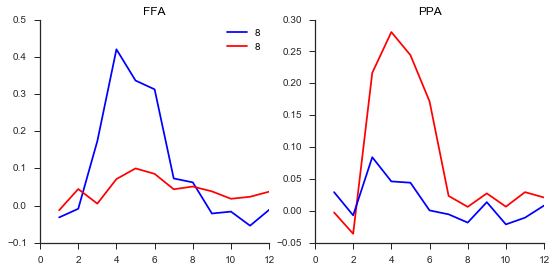

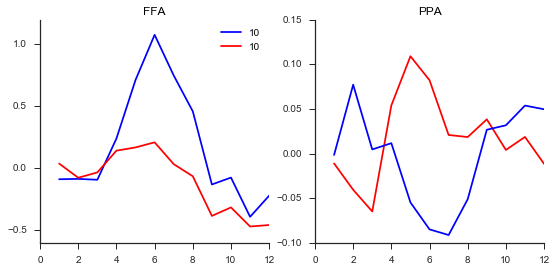

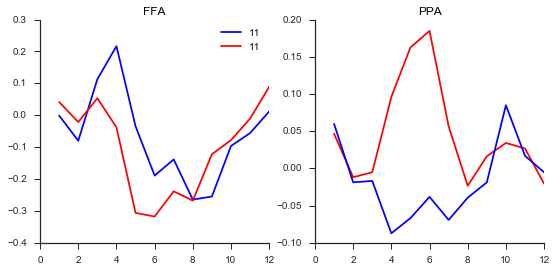

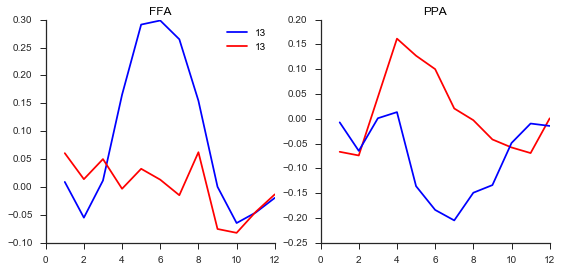

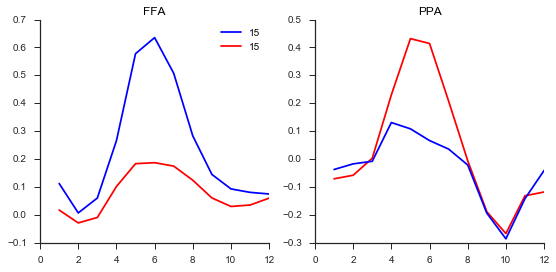

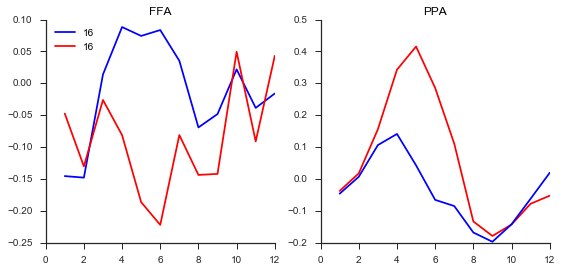

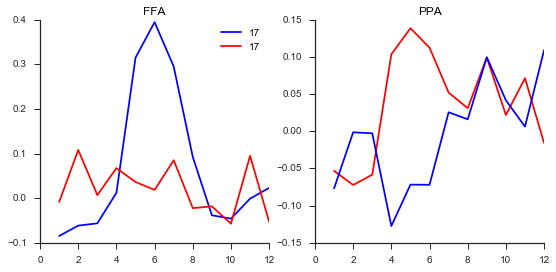

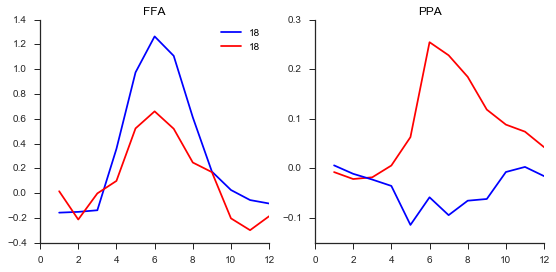

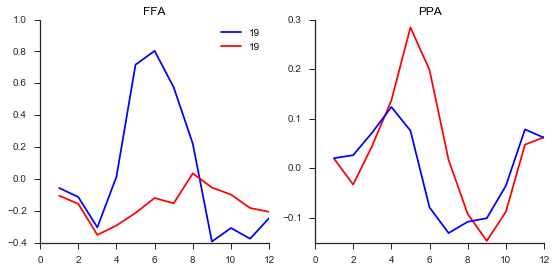

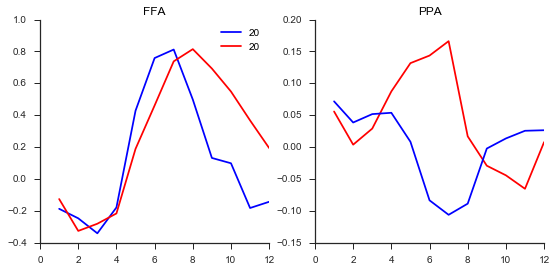

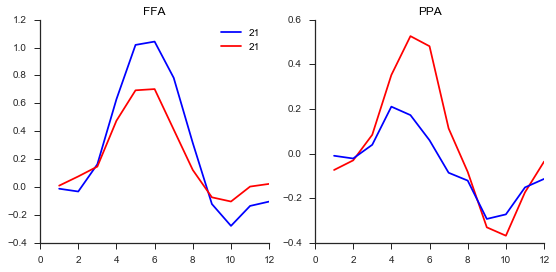

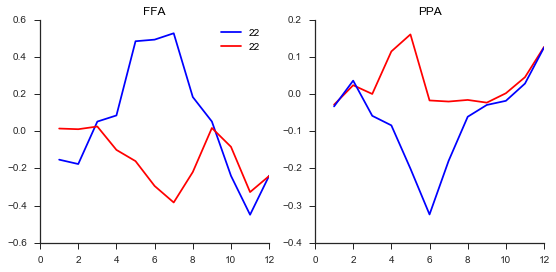

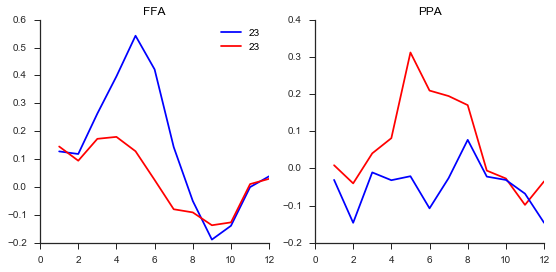

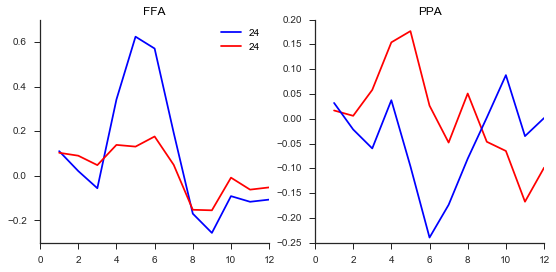

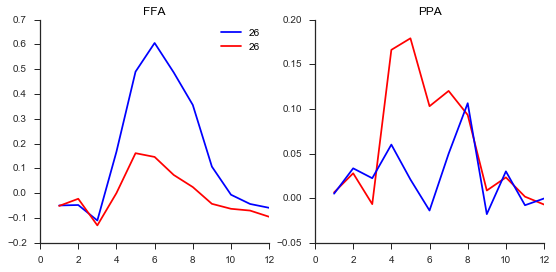

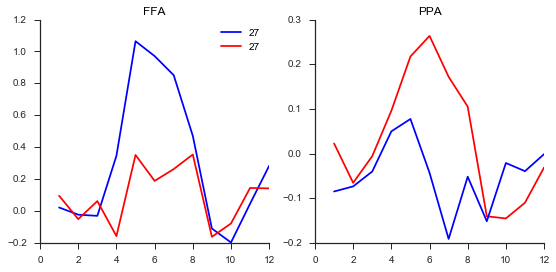

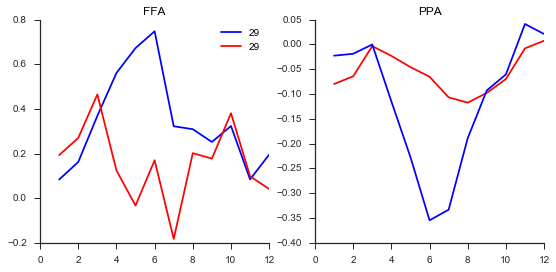

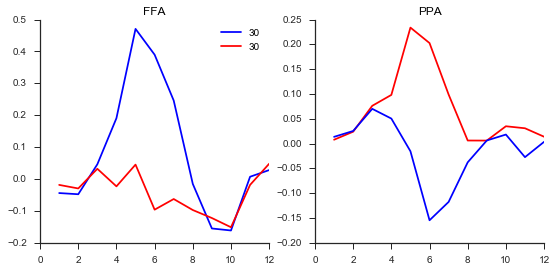

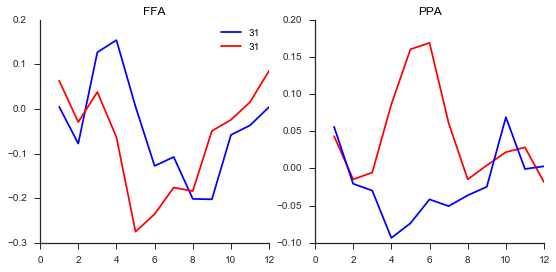

In [26]:
for r,rdat in ffa_house.iterrows():
      f, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
      ax1.plot(ffa_face.loc[r, '1':], color='b')
      ax1.plot(rdat, label=r, color='r')
      ax1.legend(loc=0)
      ax1.set_title('FFA')
      ax2.plot(ppa_house.loc[r, '1':], color='r')
      ax2.plot(ppa_face.loc[r, '1':], color='b')
      ax2.set_title('PPA')
      sns.despine()

In [312]:
wtc_ppa_h['low']=wtc_ppa_h.min(axis=1, numeric_only=True)
wtc_ppa_f['low']=wtc_ppa_f.min(axis=1, numeric_only=True)
wtc_ffa_f['hi']=wtc_ffa_f.max(axis=1, numeric_only=True)
wtc_ppa_h['hi']=wtc_ppa_h.max(axis=1, numeric_only=True)

ffa_fcF_hi = wtc_ffa_f[wtc_ffa_f.cond=='fcface'].hi
ffa_ncF_hi = wtc_ffa_f[wtc_ffa_f.cond=='ncface'].hi
ffa_hcF_hi = wtc_ffa_f[wtc_ffa_f.cond=='hcface'].hi

ppa_fcH_hi = wtc_ppa_h[wtc_ppa_h.cond=='fchouse'].hi
ppa_ncH_hi = wtc_ppa_h[wtc_ppa_h.cond=='nchouse'].hi
ppa_hcH_hi = wtc_ppa_h[wtc_ppa_h.cond=='hchouse'].hi


ppa_fcF_low = wtc_ppa_f[wtc_ppa_f.cond=='fcface'].low
ppa_ncF_low = wtc_ppa_f[wtc_ppa_f.cond=='ncface'].low
ppa_hcF_low = wtc_ppa_f[wtc_ppa_f.cond=='hcface'].low


ppa_fcF_low = wtc_ppa_f[wtc_ppa_f.cond=='fcface'].low
ppa_hcF_low = wtc_ppa_f[wtc_ppa_f.cond=='hcface'].low



/home/kyle/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/home/kyle/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from IPython.kernel.zmq import kernelapp as app
/home/kyle/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

In [280]:
face_high = wtc_ffa_f.reset_index().groupby('idx').mean().max(axis=1)
face_low = wtc_ppa_f.reset_index().groupby('idx').mean().min(axis=1)
house_high = wtc_ppa_h.reset_index().groupby('idx').mean().max(axis=1)
house_low = wtc_ffa_h.reset_index().groupby('idx').mean().min(axis=1)


In [261]:
msm['zN2a']=msm.a-(msm.zN*msm.a)
msm['zN2b']=msm.zN*msm.a
msm['vNF_n_zN2a'] = msm.vNF/msm.zN2a
msm['vNF_n_zN2b'] = msm.vNF/msm.zN2b
msm['vNH_n_zN2a'] = msm.vNH/msm.zN2a
msm['vNH_n_zN2b'] = msm.vNH/msm.zN2b

In [16]:
ffa_face_max = np.mean([ffa_fcF_hi,ffa_ncF_hi,ffa_hcF_hi], axis=0)
ppa_house_max = np.mean([ppa_fcH_hi,ppa_ncH_hi,ppa_hcH_hi], axis=0)
ppa_face_min = np.mean([ppa_fcF_low, ppa_ncF_low, ppa_hcF_low], axis=0)

face_drift=np.mean(msm[['vFF_n_zF2a', 'vNF_n_zN2a', 'vHF_n_zH2a']], axis=1)
house_drift=np.mean(msm[['vFH_n_zF2b', 'vNH_n_zN2b', 'vHH_n_zH2b']], axis=1)

sns.regplot(ffa_face_max, face_drift, truncate=True)
sns.regplot(ppa_house_max, house_drift, truncate=True)
#pearsonr(house_high, np.mean(msm[['vFH_n_zF2b', 'vNH_n_zN2b', 'vHH_n_zH2b']], axis=1))
#pearsonr(ffa_fcF_hi-ppa_fcF_low, msm['vFF_n_zF2a'])
pearsonr(np.mean([ffa_fcF_hi, ffa_ncF_hi, ffa_hcF_hi], axis=0), np.mean(msm[['vFF_n_zF2a', 'vNF_n_zN2a', 'vHF_n_zH2a']], axis=1))

NameError: name 'ffa_fcF_hi' is not defined

## Calculate Slope and Regression Functions

In [17]:
from matplotlib import rc
rc('text', usetex=False)
#'$\/CI_{95%s}[%.2f, %.2f]$' % ('\%', cis[0], cis[1])

In [18]:
def get_slopes(df, start='2', direction='pos'):
      slopes=[]
      if 'idx' in df.columns:
            sub_id_string = 'idx'
      elif 'sx' in df.columns:
            sub_id_string = 'sx'
      elif any([x==df.index.name] for x in ['idx', 'sx']):
            sub_id_string = df.index.name
            df.reset_index(inplace=True)
      
      
      for i, (sx, sxvec) in enumerate(df.groupby(sub_id_string)):
            xhigh=np.where(sxvec.values==sxvec[start].values)[1][0]
            yhigh=sxvec[start].values[0]
            if direction=='pos':
                  xlow=np.where(sxvec.values==sxvec[start].values)[1][0]
                  ylow=sxvec[start].values[0]
                  xhigh=np.where(sxvec.values==np.max(sxvec.ix[:,start:].values[0][1:]))[1][0]
                  yhigh=np.max(sxvec.ix[:,start:].values)

            elif direction=='neg':
                  xlow=np.where(sxvec.values==np.min(sxvec.ix[:,start:].values[0][1:]))[1][0]
                  ylow=np.min(sxvec.ix[:,start:].values)
                  xhigh=np.where(sxvec.values==sxvec[start].values)[1][0]
                  yhigh=sxvec[start].values[0]

            else: 
                  print "direction must be string, 'pos' or 'neg'"
                  return []
            
            slopes.append((yhigh-ylow)/(xhigh-xlow))
      return np.array(slopes)    

def corrplots(x, y, brain, param, stim, cond, test='pearson', start='1', direct='pos', normalize=False, calc_slope=True, switch=2):
      sns.set(style='white', font_scale=1.6)
      #conditions = [' '.join(stimcond) for stimcond in itertools.product(stim, cond)]
      #clist=[blues[0], blues[-1], reds[0], reds[-1]]
      clist = hs([blues[::-1], reds[::-1]]).tolist()[::-1]
      if len(y)==2:
            switch=1
            clist= [clist[0], clist[2]]
      if len(y)>4:
            clist.insert(2, 'k')
            clist.insert(5, 'k')
            switch=3
      f, (ax1, ax2) = plt.subplots(1,2, figsize=(9,5), sharey=True, sharex=True)
      #f, ax1 = plt.subplots(1, figsize=(6,5.5))
      for i, (xi, yi) in enumerate(zip(x, y)):
            if i < switch:
                  ax=ax1
            else: 
                  ax=ax2

            if calc_slope:
                  yi = get_slopes(yi, start, direction=direct)
            
            if normalize:
                  xi = (xi - xi.mean())/xi.std()
                  yi = (yi - yi.mean())/yi.std()
            
            plot_regression(xi, yi, robust=False, color=clist[i], ax=ax, cond=cond[i], test=test)

      for i, ax in enumerate([ax1, ax2]):
            ax.legend(loc=2, fancybox=True, frameon=True, framealpha=.7, fontsize=17)
            ax.set_xlabel(' '.join([stim[i], param]), fontsize=18)
      
      ax1.set_ylabel(brain, fontsize=18)
      plt.tight_layout()
      return f
    
def plot_regression(x, y, robust=True, color='Navy', cond=None, title=None, test='pearson', ax=None, alpha=1):
      
      if ax is None:
            f, ax = plt.subplots(1)
      if test == 'ci':
            cis = boot.ci((x, y), statfunction=stats.linregress, alpha=.05, method='bca')[:,2]
            legend = '$\/CI_{95%s}[%.2f, %.2f]$' % ('\%', cis[0], cis[1])
      elif test in ['pearson', 'spearman']:
            if test=='pearson':       
                  rho, pval = pearsonr(x, y)
                  rho_id =';\/r='
            elif test=='spearman':  
                  rho, pval = spearmanr(x, y) 
                  rho_id =';\/r_{s}='
            if pval<=.05: sym = '\star'   
            elif pval<=.1: sym='\dagger'
            else: sym = 'n.s.'
            legend =r'$%s%.2f%s$' % (rho_id, rho, sym)
      else:
            raise ValueError('test must be ci, pearson, or spearman')
      
      if cond:
            legend = cond + legend
      if color=='k':
            alphaM=0.0
            alphaL=0.45
            ls='--'
      else:
            alphaL=1
            alphaM=1
            ls='-'
      sns.regplot(x, y, robust=robust, truncate=True, fit_reg=True, ci=None, line_kws={"color":color, 'lw':2.5, 'label':legend, 'alpha':alphaL, 'linestyle':ls}, scatter_kws={'color':color, 'alpha':alphaM}, ax=ax)
      sns.despine()
      plt.tight_layout()

In [50]:
sl1, y1 = calc_idx_slope(wtc_ffa, idx=13)
sl2, y2 = calc_idx_slope(wtc_ffa, idx=10)

In [51]:
sl1

0.016487819999999077

In [49]:
sl2

0.22053617413178986

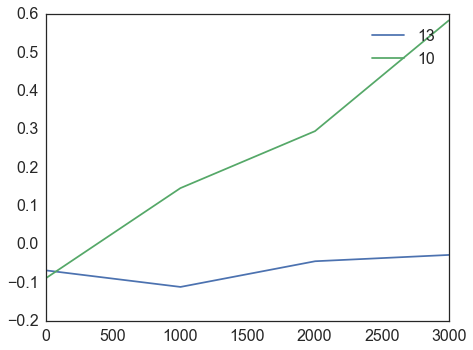

In [52]:
x=np.arange(len(y1))
plt.plot(x, y1, label='13')
plt.plot(x, y2, label='10')
ax=plt.gca()
ax.legend()

In [40]:
def calc_idx_slope(dff, idx):
      
      #dff = df.drop('idx')
      if dff.index.name=='idx':
            dfx = dff.copy()
            dff = dfx.reset_index()
      x = array([int(C) for C in dff.loc[:,'1':].columns])
      y = dff[dff.idx==idx].loc[:,'1':].values[0]

      xinterp=hs([np.linspace(x[i], x[i+1], 1000) for i in range(len(x)-1)]).astype(float)
      yinterp=np.interp(xinterp, x, y)
      
      pk_index = yinterp.argmax()
      leadedge = yinterp[:pk_index]
      
      ypeak = yinterp[pk_index]
      ylow = .15*ypeak
      
      if np.all(leadedge>ylow):
            yonset=leadedge[0]
            xonset=xinterp[0]
      else:
            yonset = yinterp[leadedge[leadedge<=ylow].argmax()]
            xonset = xinterp[leadedge[leadedge<=ylow].argmax()]
      
      xpeak = xinterp[pk_index]

      return (ypeak-yonset)/(xpeak-xonset), leadedge


In [19]:
get_peaks = lambda df: df.loc[:, '1':].max(axis=1, numeric_only=True)
get_troughs = lambda df: df.loc[:, '1':].min(axis=1, numeric_only=True)
get_avg = lambda df, start, end: df.loc[:, start:end].mean(axis=1, numeric_only=True)


In [35]:

diff=[wtc_d.query('cond=="hchouse"'), wtc_d.query('cond=="fchouse"'), 
   wtc_d.query('cond=="fcface"'), wtc_d.query('cond=="hcface"')]
v=[msm.vHH_n_a.values, msm.vFH_n_a.values, 
   msm.vFF_n_a.values, msm.vHF_n_a.values]
for i, d in enumerate(diff):
      print d.cond.unique()[0]
      print 'slopes', pearsonr(v[i], calc_idx_slope(d))
      print 'peaks', pearsonr(v[i], get_peaks(d))
      print '\n'

hchouse
slopes

TypeError: calc_idx_slope() takes exactly 2 arguments (1 given)

# T-Test Fast, Slow Slopes

In [10]:
ppay=[wtc_ppa.query('cond=="hchouse"'), wtc_ppa.query('cond=="fchouse"'), 
   wtc_ppa.query('cond=="fcface"'), wtc_ppa.query('cond=="hcface"')]

ffay=[wtc_ffa.query('cond=="hchouse"'), wtc_ffa.query('cond=="fchouse"'), 
   wtc_ffa.query('cond=="fcface"'), wtc_ffa.query('cond=="hcface"')]

for i, d in enumerate([ppay, ffay]):
    print ttest_rel(get_slopes(d[0]), get_slopes(d[1]))
    print ttest_rel(get_slopes(d[2]), get_slopes(d[3]))

(-2.7890620934029724, 0.012117300811787893)
(1.6427290427138803, 0.11779303065327808)
(0.98828696688222506, 0.3361117920044554)
(-2.024473310270904, 0.058019215394976772)


In [11]:
ppay=[stc_ppa.query('cond=="HFast"'), stc_ppa.query('cond=="HSlow"'), 
   stc_ppa.query('cond=="FFast"'), stc_ppa.query('cond=="FSlow"')]
ffay=[stc_ffa.query('cond=="HFast"'), stc_ffa.query('cond=="HSlow"'), 
   stc_ffa.query('cond=="FFast"'), stc_ffa.query('cond=="FSlow"')]

for i, d in enumerate([ppay, ffay]):    
    print ttest_rel(get_slopes(d[0]), get_slopes(d[1]))
    print ttest_rel(get_slopes(d[2]), get_slopes(d[3]))

(2.6020431984881656, 0.018021784152901177)
(-0.2517476714036806, 0.80408796668406524)
(0.37195122180205781, 0.7142718380848434)
(7.5854414997653725, 5.1847147438776137e-07)


In [27]:
ppay=[wpk_ppa["hc-hcH"], wpk_ppa["fc-fcH"], 
    wpk_ppa["fc-fcF"], wpk_ppa["hc-hcF"]]

ffay=[wpk_ffa["hc-hcH"], wpk_ffa["fc-fcH"], 
    wpk_ffa["fc-fcF"],wpk_ffa["hc-hcF"]]

for i, d in enumerate([ppay, ffay]):    
    print ttest_rel(d[0], d[1])
    print ttest_rel(d[2], d[3])

Ttest_relResult(statistic=-2.7022402059562487, pvalue=0.014582115761102363)
Ttest_relResult(statistic=-1.0763078057320088, pvalue=0.29600461585608095)
Ttest_relResult(statistic=0.89884650297385538, pvalue=0.3806014947047166)
Ttest_relResult(statistic=-3.8823093691189894, pvalue=0.0010916141767539893)


In [28]:
ppay=[wpk_ppa["hcH"], wpk_ppa["fcH"], 
    wpk_ppa["fcF"], wpk_ppa["hcF"]]

ffay=[wpk_ffa["hcH"], wpk_ffa["fcH"], 
    wpk_ffa["fcF"], wpk_ffa["hcF"]]

for i, d in enumerate([ppay, ffay]):    
    print ttest_rel(d[0], d[1])
    print ttest_rel(d[2], d[3])

Ttest_relResult(statistic=-3.1517337984922698, pvalue=0.0055173157118805771)
Ttest_relResult(statistic=-1.4262617459612432, pvalue=0.17090713143942196)
Ttest_relResult(statistic=-0.70091747359790535, pvalue=0.49231689341504747)
Ttest_relResult(statistic=-2.5256425319695994, pvalue=0.021148387293976834)


In [156]:
ppay=[wpk_ppa["hc"], wpk_ppa["fc"], 
    wpk_ppa["fc"], wpk_ppa["hc"]]

ffay=[wpk_ffa["hc"], wpk_ffa["fcH"], 
    wpk_ffa["fcF"], wpk_ffa["hcF"]]

for i, d in enumerate([ppay, ffay]):    
    print ttest_rel(d[0], d[1])
    print ttest_rel(d[2], d[3])

(-0.041906928813351216, 0.96703425001621868)
(0.041906928813351216, 0.96703425001621868)
(-1.0439516008872276, 0.31032619980940035)
(-2.5256425319695994, 0.021148387293976834)


In [ ]:
sns.regplot()

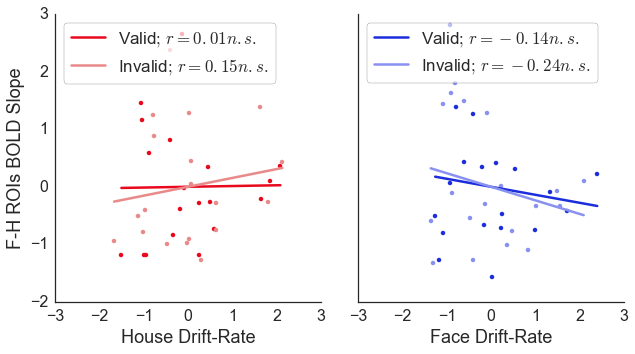

In [29]:
brain = 'F-H ROIs BOLD Slope'
param = 'Drift-Rate'
stim = ['House','Face']
cond = hs(['Valid', 'Invalid']*2).tolist()

x=[msm.vHH_n_a.values, msm.vFH_n_a.values, 
   msm.vFF_n_a.values, msm.vHF_n_a.values]

#x=[msm.vHH_n_zH2b.values, msm.vFH_n_zF2b.values, 
  # msm.vFF_n_zF2a.values, msm.vHF_n_zH2a.values]
#bold=[wtc_ppa.query('cond=="hchouse"'), wtc_ppa.query('cond=="fchouse"'), wtc_ffa.query('cond=="fcface"'), wtc_ffa.query('cond=="hcface"')]

bold=[wtc_d.query('cond=="hchouse"'), wtc_d.query('cond=="fchouse"'), 
   wtc_d.query('cond=="fcface"'), wtc_d.query('cond=="hcface"')]


f = corrplots(x, bold, brain, param, stim, cond, direct='pos', start='1', 
                  normalize=True, test='pearson', calc_slope=True)
axes=f.axes
for ax in axes:
      ax.set_ylim(-2, 3)
      ax.set_xlim(-3, 3)
#f.savefig('/Users/kyle/Desktop/WIN_FFA-PPA_SlopeDrift.png', dpi=600)

In [34]:
clist=[sns.color_palette('Blues')[i] for i in [0, 1, -2, -1]]

In [431]:
fslow_delta = stc_ffa.query('cond=="FSlow"').loc[:, '1':]-stc_ppa.query('cond=="FSlow"').loc[:, '1':]
ffast_delta = stc_ffa.query('cond=="FFast"').loc[:, '1':]-stc_ppa.query('cond=="FFast"').loc[:, '1':]
#plt.plot(stc_ffa.query('cond=="FFast"').loc[:, '1':].mean())
#plt.plot(stc_ffa.query('cond=="FSlow"').loc[:, '1':].mean())
#plt.plot(stc_ffast_delta.mean())
#plt.plot(stc_fslow_delta.mean())

In [55]:
clist = hs([blues[::-1], reds[::-1]]).tolist()[::-1]
clist.insert(2, 'k')
clist.insert(5, 'k')

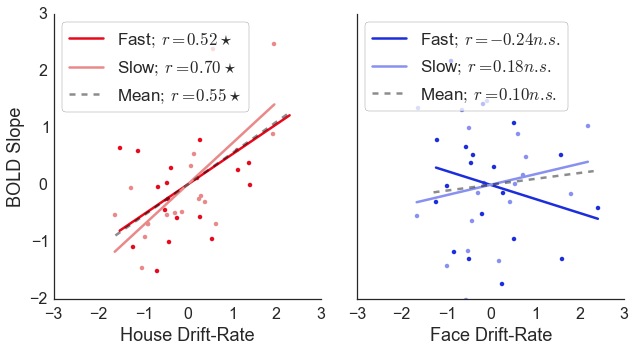

In [717]:
brain = 'BOLD Slope'
param = 'Drift-Rate'
stim = ['House','Face']
cond = hs(['Fast', 'Slow', 'Mean']*2).tolist()

x=[spd_normb(spd.vHFast.values), spd_normb(spd.vHSlow.values), 
   np.mean([spd_normb(spd.vHFast.values), spd_normb(spd.vHSlow.values)], axis=0), 
   spd_norma(spd.vFFast.values), spd_norma(spd.vFSlow.values),
   np.mean([spd_norma(spd.vFFast.values), spd_norma(spd.vFSlow.values)], axis=0)]

#bold=[spk_ppa["HFast"], spk_ppa["HSlow"],
#      np.mean([spk_ppa["HFast"].values, spk_ppa["HSlow"].values], axis=0),
#      spk_ffa["FFast"], spk_ffa["FSlow"],
#      np.mean([spk_ffa["FFast"].values, spk_ffa["FSlow"].values], axis=0)]

HMean_STC = pd.concat([stc_ppa.query('cond=="HFast"').loc[:, '1':], stc_ppa.query('cond=="HSlow"').loc[:, '1':]]).reset_index().groupby('idx').mean()
FMean_STC = pd.concat([stc_ffa.query('cond=="FFast"').loc[:, '1':], stc_ffa.query('cond=="FSlow"').loc[:, '1':]]).reset_index().groupby('idx').mean()

bold=[stc_ppa.query('cond=="HFast"'), stc_ppa.query('cond=="HSlow"'), 
      HMean_STC,
      stc_ffa.query('cond=="FFast"'), stc_ffa.query('cond=="FSlow"'),
      FMean_STC]

#bold=[get_auc(bb) for bb in bold]
f = corrplots(x, bold, brain, param, stim, cond, direct='pos', start='2', 
                  normalize=True, test='pearson', calc_slope=True)
#f = corrplots(x, bold, brain, param, stim, cond, normalize=True, test='pearson', calc_slope=False)
axes=f.axes
for ax in axes:
      ax.set_ylim(-2, 3)
      ax.set_xlim(-3, 3)
f.savefig('/home/kyle/Dropbox/WSS_SlopeDrift_pearson.png', dpi=600)

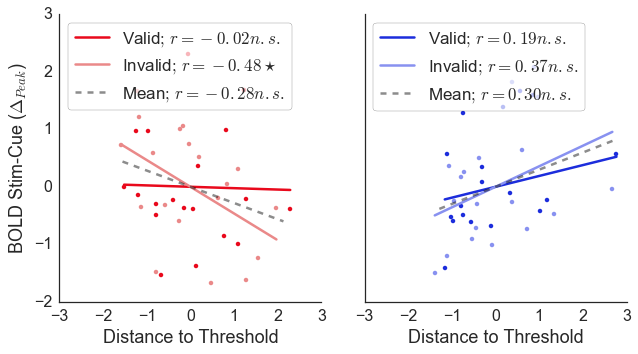

In [30]:
brain = 'BOLD Stim-Cue ($\Delta_{Peak}$)'
param = 'to Threshold'
stim = hs(['Distance']*2).tolist()
cond = hs(['Valid', 'Invalid', 'Mean']*2).tolist()

x=[msm.zH2b.values, msm.zF2b.values,
   np.mean([msm.zH2b.values, msm.zF2b.values], axis=0),
   msm.zF2a.values, msm.zH2a.values,
  np.mean([msm.zF2a.values, msm.zH2a.values], axis=0)]

#x=[wpk_ffa["hc-hcH"], wpk_ffa["fc"],
#    wpk_ppa["fc-fcF"], wpk_ppa["hc-hcF"]]
#x=[msm.vHH_n_a.values, msm.vFH_n_a.values, 
#   msm.vFF_n_a.values, msm.vHF_n_a.values]
   
bold=[wpk_ppa["hc-hcH"], wpk_ppa["fc-fcH"],
      np.mean([wpk_ppa["hc-hcH"].values, wpk_ppa["fc-fcH"].values], axis=0),
      wpk_ffa["fc-fcF"], wpk_ffa["hc-hcF"],
      np.mean([wpk_ffa["fc-fcF"].values, wpk_ffa["hc-hcF"].values], axis=0)]

f = corrplots(x, bold, brain, param, stim, cond, normalize=True, test='pearson', calc_slope=False)
axes=f.axes
for i, ax in enumerate(axes):
      ax.set_ylim(-2, 3)
      ax.set_xlim(-3, 3)
      if i==1:
            ax.set_ylabel('')
#f.savefig('/home/kyle/Dropbox/WIN_DeltaBound_CueStim_Pearson.png', dpi=600)

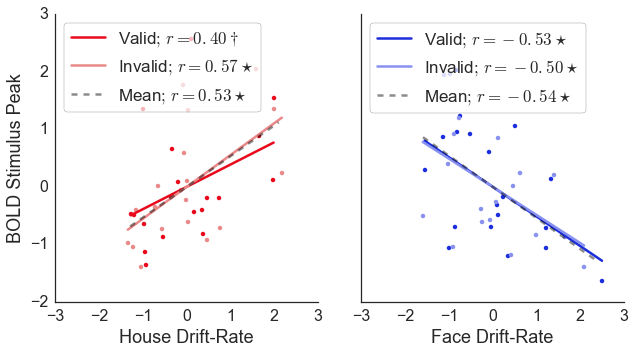

In [31]:
brain = 'BOLD Stimulus Peak'
param = 'Drift-Rate'
stim = ['House', 'Face']
cond = hs(['Valid', 'Invalid', 'Mean']*2).tolist()

#x=[msm.zH2b.values, msm.zF2b.values,
#   msm.zF2a.values, msm.zH2a.values]

#x=[wpk_ffa["hc-hcH"], wpk_ffa["fc"],
#    wpk_ppa["fc-fcF"], wpk_ppa["hc-hcF"]]
x=[msm.vHH_n_zH2b.values, msm.vFH_n_zF2b.values,
   np.mean([msm.vHH_n_zH2b.values, msm.vFH_n_zF2b.values], axis=0),
   msm.vFF_n_zF2a.values, msm.vHF_n_zH2a.values,
   np.mean([msm.vFF_n_zF2a.values, msm.vHF_n_zH2a.values], axis=0)]
   
bold=[wpk_ppa["hcH"], wpk_ppa["fcH"],
      np.mean([wpk_ppa["hcH"].values, wpk_ppa["fcH"].values], axis=0),
    wpk_ffa["fcF"], wpk_ffa["hcF"],
     np.mean([wpk_ffa["fcF"].values, wpk_ffa["hcF"].values], axis=0)]


f = corrplots(x, bold, brain, param, stim, cond, normalize=True, test='pearson', calc_slope=False)
axes=f.axes
for i, ax in enumerate(axes):
      ax.set_ylim(-2, 3)
      ax.set_xlim(-3, 3)
      if i==1:
            ax.set_ylabel('')
#f.savefig('/home/kyle/Dropbox/WIN_pearson_DriftRate_StimPeakOnly.png', dpi=600)

In [216]:
#v=[msm.vHH_n_zH2b.values, msm.vFH_n_zF2b.values, 
#   msm.vFF_n_zF2a.values, msm.vHF_n_zH2a.values]
v=[msm.vHH_n_a.values, msm.vFH_n_a.values, 
   msm.vFF_n_a.values, msm.vHF_n_a.values]
z=[msm.zH2b.values, msm.zF2b.values,
   msm.zF2a.values, msm.zH2a.values]
for vv, zz in zip(v, z):
      print spearmanr(vv, zz)

(-0.64210526315789462, 0.003035365598632564)
(-0.49649122807017537, 0.030596195263387572)
(-0.075438596491228069, 0.75888686862627575)
(-0.27368421052631575, 0.2568831960450062)


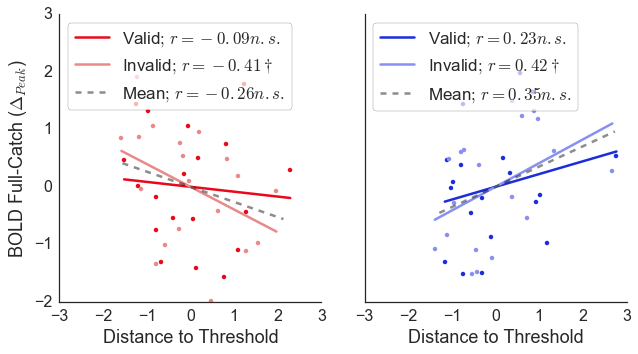

In [32]:
brain = 'BOLD Full-Catch ($\Delta_{Peak}$)'
param = 'to Threshold'
stim = hs(['Distance']*2).tolist()
cond = hs(['Valid', 'Invalid', 'Mean']*2).tolist()

x=[msm.zH2b.values, msm.zF2b.values,
   msm.zF2a.values, msm.zH2a.values]

bold=[bpk_ppa["hc-hcH"], bpk_ppa["fc-fcH"],
    bpk_ffa["fc-fcF"], bpk_ffa["hc-hcF"]]

x=[msm.zH2b.values, msm.zF2b.values,
   np.mean([msm.zH2b.values, msm.zF2b.values], axis=0),
   msm.zF2a.values, msm.zH2a.values,
   np.mean([msm.zF2a.values, msm.zH2a.values], axis=0)]


bold=[bpk_ppa["hc-hcH"], bpk_ppa["fc-fcH"],
      np.mean([bpk_ppa["hc-hcH"].values, bpk_ppa["fc-fcH"].values], axis=0),
      bpk_ffa["fc-fcF"], bpk_ffa["hc-hcF"],
      np.mean([bpk_ffa["fc-fcF"].values, bpk_ffa["hc-hcF"].values], axis=0)]


f = corrplots(x, bold, brain, param, stim, cond, normalize=True, test='pearson', calc_slope=False)
axes=f.axes
for i, ax in enumerate(axes):
      ax.set_ylim(-2, 3)
      ax.set_xlim(-3, 3)
      if i==1:
            ax.set_ylabel('')
#f.savefig('/home/kyle/Dropbox/BW_DeltaBound_CueStim_pearson.png', dpi=600)

In [33]:
brain = 'BOLD Stim-Cue ($\Delta_{Peak}$)'

param = 'Drift-Rate'
cond = ['Mean House', 'Mean Face']
stim = hs(['', '']*1).tolist()

ffa_face_max = np.mean([ffa_fcF_hi, ffa_hcF_hi], axis=0)
ppa_house_max = np.mean([ppa_fcH_hi, ppa_hcH_hi], axis=0)
ppa_face_min = np.mean([ppa_fcF_low, ppa_hcF_low], axis=0)

face_drift=np.mean(msm[['vFF_n_zF2a', 'vHF_n_zH2a']], axis=1)
house_drift=np.mean(msm[['vFH_n_zF2b', 'vHH_n_zH2b']], axis=1)

x=[house_drift, face_drift]
bold=[ppa_house_max, ffa_face_max]

f = corrplots(x, bold, brain, param, stim, cond, normalize=True, test='pearson', calc_slope=False)
axes=f.axes
for i, ax in enumerate(axes):
      ax.set_ylim(-2, 3)
      ax.set_xlim(-3, 3)
      if i==1:
            ax.set_ylabel('')

#f.savefig('/home/kyle/Dropbox/WIN_AvgDriftRates_DeltaPeak_Pearson.png', dpi=600)

NameError: name 'ffa_fcF_hi' is not defined